In [330]:
# Some functions for basic option calculations and visualization of 
# payout diagrams for various trade portfolios - "synthetic" options.

In [59]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
%matplotlib inline

In [35]:
def getPrice(symbol):
    response = requests.get(f"https://api.iextrading.com/1.0/stock/{symbol}/price")
    if response.status_code == 200:
        try:
            return float(response.text)
        except:
            return False
    else:
        return False

In [265]:
def payout(option,spot):
    if option.type == "call" and option.qty >= 0:
        # long call
        # bet the spot goes above K, if spot below K I make zero - subtract paid premium
        return max(spot - option.K,0) * option.qty - (option.price*option.qty)
    if option.type == "call" and option.qty < 0:
        # short call
        # bet that price is below K vs bet the price is above K -
        # I only make money (the premium) if the price goes below K. Otherwise max loss is K.
        return -max(spot - option.K,0) * abs(option.qty) + (option.price*abs(option.qty))
    if option.type == "put" and option.qty >= 0:
        # long put
        # bet the spot goes below K, if spot above K I make zero - subtract paid premium
        return max(option.K - spot,0) * option.qty - (option.price*option.qty)
    if option.type == "put" and option.qty < 0: 
        # short put
        # bet that price is above K vs bet the price is below K -
        # I only make money (the premium) if the price goes above K. Otherwise max loss is K.
        return -max(option.K - spot,0) * abs(option.qty) + (option.price*abs(option.qty))
    # asset holding
    if option.qty >= 0:
        return spot - option.K
    else:
        return option.K - spot
    

In [245]:
def payoutgraph(options,price,showsum=True):
    res = 100
    pricerange = np.linspace(price-10,price+10,res)
    sumlines = np.zeros(res)
    fig, ax = plt.subplots()
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(price, color='black', linewidth=.5)
    for option in options:
        pay = [payout(option,spot) for spot in pricerange]
        sumlines = sumlines + pay
        ax.plot(pricerange,pay)
    if showsum:
        ax.plot(pricerange,sumlines, color='r',linewidth='2')
    plt.show()
    plt.close()

In [326]:
Option = namedtuple("Option","type qty K sym price")

In [332]:
AAPL = "AAPL"
spot = getPrice(AAPL) 

In [339]:
# long call spread.
legs = [Option("call",1,spot-2,AAPL,2),
       Option("call",-1,spot+2,AAPL,1)]
legs


[Option(type='call', qty=1, K=170.91, sym='AAPL', price=2),
 Option(type='call', qty=-1, K=174.91, sym='AAPL', price=1)]

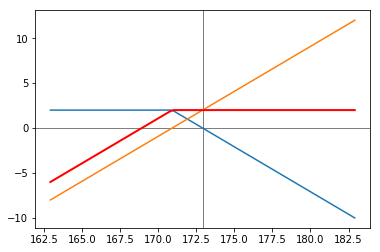

In [348]:
payoutgraph(legs,spot)

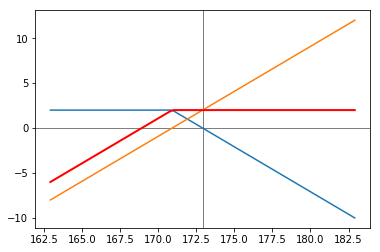

In [347]:
# covered call
legs = [Option("call",-1,spot-2,AAPL,2),
       Option("",1,spot-2,AAPL,1)]
legs
payoutgraph(legs,spot)